Utilizamos uma variavel de ambiente que é uma chave para conectar com o airtable. Vá na sua conta do airtable 'Account'.
Na area API pegue sua API Key. Então no seu repo crie um arquivo .env e coloque da seguinte forma:
export AIRTABLE_API_KEY=API_KEY
Sendo no campo API_KEY sua key.

In [1]:
from dotenv import dotenv_values 
config = dotenv_values(".env")
api_key = config['AIRTABLE_API_KEY']

https://airtable.com/appgUg041aeWfcxGc/tblUpku2OvK6Y6FGb/viwSwDZRjL2gi2qiJ?blocks=hide

In [2]:
from pyairtable import Table
table = Table(api_key, 'appgUg041aeWfcxGc', 'tblUpku2OvK6Y6FGb')

PERGUNTAS QUE DÁ PARA RESPONDER:
1. O time que é campeão vence mais da metade dos jogos?
2. Qual média de vitorias dos times que vencem o campeonato?
4. E os times que fazem menos gols são os que caem?
5. Qual média de derrotas dos times que foram rebaixados?
7. Os times que vencem os campeonatos são os times que fazem mais gols?

-------------------------
1. Os time que tomam menos gols, ficam em qual zona na tabela?
2. Os times que fazem mais gols, ficam em qual zona na tabela?
3. Os times com mais empates, ficam em qual zona na tabela?
4. Os times que tomam mais gols, ficam em qual zona na tabela?
8. O time com melhor saldo de gols, fica em qual zona da tabela?

PERGUNTAS QUE NÃO DÁ PARA RESPONDER:

3. O time que vence o campeonato é o time que mais faz pontos no primeiro ciclo de jogos?
6. O time que mais chuta é o time que mais faz gol?

-------------------------
5. Os 3 primeiros artilheiros do campeonato, refletem no time ficar nas zonas excelentes ou ótimas?
6. Os times que fazem mais gols em um jogo, ficam em qual zona da tabela?
7. Os times que tomam mais gols em um jogo, ficam em qual zona da tabela?
9. O time com mais média de posse de bola, fica em qual zona da tabela?

-------------------------
1. Existe um esquema tatico mais vencedor no campeonato?
2. O time que vence o campeonato, vence mais que os outros dentro e fora de casa?

Transformando a tabela em uma list<dict>

In [3]:
listDict = table.all()

Passando os campos que vamos usar para a lista brasileirão.

In [4]:
listaBrasileirao = []
for i in listDict:
    listaBrasileirao.append(i['fields'])


Salvando em Json, para utilização

In [5]:
import json
with open('listaBrasileirao.json', 'w') as json_file:
    jsonStr = json.dump(listaBrasileirao, json_file, ensure_ascii=False)
    print(jsonStr)

None


Documento json pronto para uso

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

listaBrasileirao = pd.read_json('listaBrasileirao.json')

O time que é campeão vence mais da metade dos jogos?

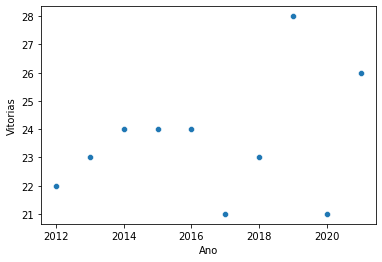

In [7]:
sns.scatterplot(x = 'Ano', y = listaBrasileirao['Vitorias'].where(listaBrasileirao['Posicao'] == 1) ,data=listaBrasileirao)
plt.show()


/Users/alexandrebomfim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Posicao', ylabel='count'>

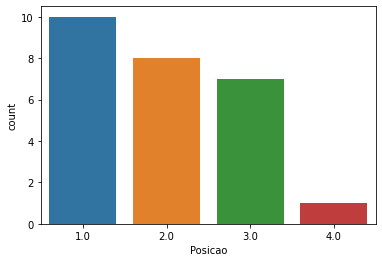

In [18]:
sns.countplot(listaBrasileirao['Posicao'].where(listaBrasileirao['Vitorias'] > 19))

Os quatro primeiros times vencem mais da metade dos jogos?

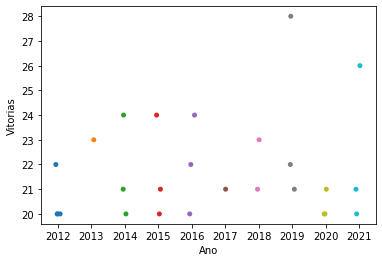

In [48]:
sns.stripplot(x='Ano',y = listaBrasileirao['Vitorias'].where(listaBrasileirao['Vitorias'] > 19), data=listaBrasileirao)
plt.show()